In [1]:
#Import relevant libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Dados de Tese

In [2]:
df = pd.read_excel('data/DW_Pneumonia_episodios.xls')
print("Number of Columns: ",df.shape[1])
print("Number of Rows: ",df.shape[0])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Number of Columns:  102
Number of Rows:  15355


In [3]:
df.head()

,Key,SourceKey,Idioma,HospitalRegiaoId,HospitalCodigo,ServicoId,DoenteId,DoenteDataNascimento,DoenteIdadeEmAnos,DoenteDecadas,...,NrPrescricoesBroncodilatador,Psicofarmaco,NrPrescricoesPsicofarmaco,Opiaceo,NrPrescricoesOpiaceo,RelaxanteMuscular,NrPrescricoesRelaxanteMuscular,Antibiotico,NrPrescricoesAntibiotico,LineageKey
0,1,3005,PT,3,15,3,2383,1951-09-30,66,7,...,6,0,0,1,2,0,0,1,8,1
1,2,3006,PT,3,15,3,2384,1946-10-23,71,8,...,0,1,1,1,2,1,1,1,5,1
2,3,3012,PT,3,15,3,2390,1964-01-22,54,6,...,4,1,2,1,1,0,0,1,3,1
3,4,3013,PT,3,15,1,2391,1956-05-31,61,7,...,0,1,1,1,2,1,3,1,4,1
4,5,3019,PT,3,15,2,2397,1944-07-20,73,8,...,1,0,0,0,0,0,0,1,4,1


In [4]:
"""
    Get only some features
"""
# Convert the dictionary into DataFrame
df_v2 = pd.DataFrame({'DoenteIdadeEmAnos': df['DoenteIdadeEmAnos']})
df_v2['ServicoId']=df['ServicoId']
df_v2['TipoAdmissaoId']=df['TipoAdmissaoId']
df_v2['APACHEScore']=df['APACHEScore']
df_v2['SAPSScore']=df['SAPSScore']
df_v2['NumeroDiasEntubacao']=df['NumeroDiasEntubacao']
df_v2['NumeroDiasVentilacaoInvasiva']=df['NumeroDiasVentilacaoInvasiva']
df_v2['NrPrescricoesAntibiotico']=df['NrPrescricoesAntibiotico']
df_v2['TempoInternamentoEmDias']=df['TempoInternamentoEmDias']

In [5]:
"""
    Deal with missing values
"""
print(df_v2.isnull().sum())
APACHE_mean=df['APACHEScore'].mean()
SAPS_mean=df['SAPSScore'].mean()
SAPS_mean=df['TipoAdmissaoId'].mean()
  

# Remove rows with missing values
df_v2.dropna(axis=0, inplace=True)

print("Sum of all missing values: ",df_v2.isnull().sum().sum())
print("Number of Columns: ",df_v2.shape[1])
print("Number of Rows: ",df_v2.shape[0])
df_v2.describe()

DoenteIdadeEmAnos                  0
ServicoId                          0
TipoAdmissaoId                    58
APACHEScore                     2406
SAPSScore                       2406
NumeroDiasEntubacao                0
NumeroDiasVentilacaoInvasiva       0
NrPrescricoesAntibiotico           0
TempoInternamentoEmDias            0
dtype: int64
Sum of all missing values:  0
Number of Columns:  9
Number of Rows:  12937


,DoenteIdadeEmAnos,ServicoId,TipoAdmissaoId,APACHEScore,SAPSScore,NumeroDiasEntubacao,NumeroDiasVentilacaoInvasiva,NrPrescricoesAntibiotico,TempoInternamentoEmDias
count,12937.000000,12937.000000,12937.000000,12937.000000,12937.000000,12937.000000,12937.000000,12937.000000,12937.000000
mean,63.969931,44.059133,4.998454,19.381000,42.818660,10.244428,9.946452,2.201515,11.192598
std,15.655733,30.338502,4.042045,9.604811,18.966157,384.828485,327.997285,2.437653,32.487152
min,2.000000,1.000000,1.000000,0.000000,0.000000,-2908.183330,-13.202780,0.000000,-2908.061110
25%,54.000000,13.000000,2.000000,12.000000,29.000000,0.000000,0.000000,0.000000,2.954170
50%,66.000000,39.000000,5.000000,19.000000,41.000000,0.806940,0.898610,2.000000,6.670830
75%,76.000000,74.000000,5.000000,26.000000,55.000000,8.697220,8.750690,3.000000,14.077780
max,102.000000,103.000000,17.000000,61.000000,116.000000,43583.366670,37256.049300,32.000000,1376.811110


#### Data Visualization

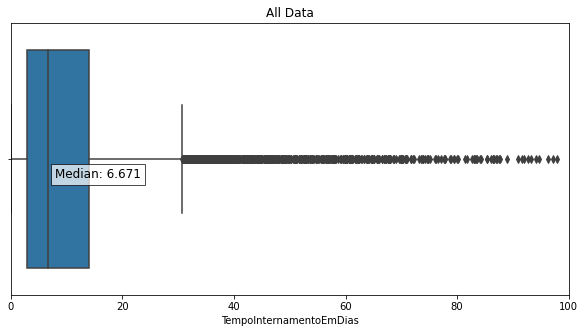

In [6]:
"""
    Box plot - Tempo de Internamento
"""
plt.figure(figsize=(10,5))
plt.xlim(0,100)
plt.xlabel('LOS')
sns.boxplot(x=df_v2['TempoInternamentoEmDias'])
 
_median = np.median(df_v2['TempoInternamentoEmDias'])

plt.title("All Data")
plt.text(8, 0.07,
         str('Median: '+str(round(_median, 3))),
         bbox=dict(facecolor='white',
                   alpha=0.7),
         fontsize=12)

plt.show()

In [9]:
"""
    Extract a sample of total data
"""
df_final = df_v2.sample(frac=0.1)

#df_final = df_v2

y = df_final.values[:,-1].astype(float)
X = df_final.values[:,:-1].astype(float)

print(f"Features: {len(X[0])}")
print(f"Examples: {len(X)}")

Features: 8
Examples: 1294


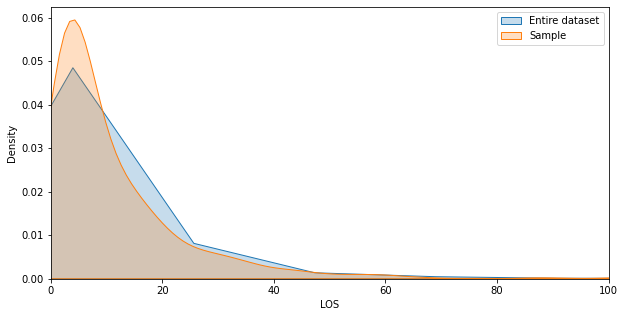

In [10]:
"""
    Density plot - Tempo de Internamento
"""
plt.figure(figsize=(10,5))
plt.xlim(0,100)
plt.xlabel('LOS')
plt.ylabel('Density')
sns.kdeplot(df_v2['TempoInternamentoEmDias'],shade=True)
sns.kdeplot(y,shade=True)
plt.legend(["Entire dataset","Sample"])
plt.show()

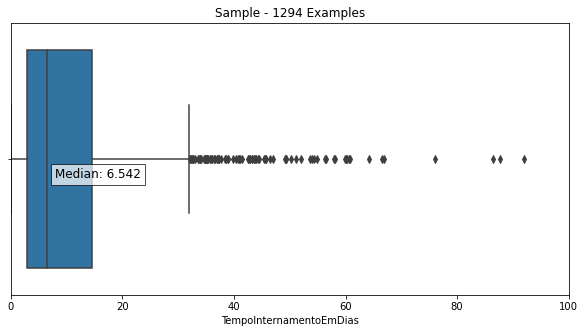

In [11]:
"""
    Box plot - Tempo de Internamento | 1294 examples
"""
plt.figure(figsize=(10,5))
plt.xlim(0,100)
plt.xlabel('LOS')
sns.boxplot(x=df_final['TempoInternamentoEmDias'])
 
_median = np.median(df_final['TempoInternamentoEmDias'])

plt.title("Sample - 1294 Examples")
plt.text(8, 0.07,
         str('Median: '+str(round(_median, 3))),
         bbox=dict(facecolor='white',
                   alpha=0.7),
         fontsize=12)

plt.show()

### Split data to test

In [12]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Examples to train: {}".format(len(X_train)))

Examples to train: 1035


# Models Validation

In [13]:
k_fold = KFold(n_splits=4)

In [14]:
def processKFold(model, X, y):
    
    scores = []
    mspe = []
    mape = []
    
    for train_indexes, val_indexes in k_fold.split(X,y):

        # normalize the data

        X_train, X_val = X[train_indexes], X[val_indexes]
        y_train, y_val = y[train_indexes], y[val_indexes]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        
        r2 = r2_score(y_val, y_pred)
        if r2 > 0:
            scores.append(r2)
            mape.append(mean_absolute_percentage_error(y_val, y_pred) * 100)
            mspe.append(np.mean(np.square(((y_val - y_pred) / y_val)), axis=0) * 100)
        
    return np.mean(scores), np.mean(mspe), np.mean(mape)

### Keras

In [15]:
"""
    Define base model    -   This network configuration is based on literature
""" 
def dl():
    # create model
    model = Sequential()
    
    model.add(Dense(59, input_dim=len(X_train[0])))
    
    model.add(Dense(128, activation='relu'))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(256, activation='relu'))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
    # Compile model
    model.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics = ['mae'])
    return model

### MLP Regressor

In [143]:
def mlp(size, act, alpha, learn_rate, solv, X, y):
    
    clf = MLPRegressor(solver=solv,   #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=alpha,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=size, 
                   activation=act, # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   learning_rate = learn_rate,
                    max_iter=2000)
    
    r2_scores, mspe, mape = processKFold(clf, X, y)
    
    return r2_scores, mspe, mape, clf

In [144]:
"""
    Define our candidate hyperparameters     
"""
hp_candidates_mlp = {'hidden_layer_sizes': [(64,32), (12,6), (32,12)],
          'activation': ['relu','tanh'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

best_hp_mlp = {'mspe':100000, 'candidates': (0,0)}
for size in hp_candidates_mlp['hidden_layer_sizes']:
    for act in hp_candidates_mlp['activation']:
        for alpha in hp_candidates_mlp['alpha']:
            for learn_rate in hp_candidates_mlp['learning_rate']:
                for solv in hp_candidates_mlp['solver']:
                    r2, mspe, mape, clf = mlp(size, act, alpha, learn_rate, solv, X_train, y_train)
                    print(mspe, size, act, alpha, learn_rate, solv)
                    if mspe < best_hp_mlp['mspe']:
                        print(mspe, size, act, alpha, learn_rate, solv)
                        candidates = (size, act, alpha, learn_rate, solv)
                        best_hp_mlp['mspe'] = mspe
                        best_hp_mlp['candidates'] = candidates
            
print("Best: ",best_hp_mlp)   #Best:  {'mspe': 581.2604278581604, 'candidates': ((64, 32), 'tanh', 0.0001, 'constant', 'adam')}

4949.985718274406 (64, 32) relu 0.0001 constant adam
4949.985718274406 (64, 32) relu 0.0001 constant adam
7145.640339498574 (64, 32) relu 0.0001 adaptive adam
4694.931441728561 (64, 32) relu 0.05 constant adam
4694.931441728561 (64, 32) relu 0.05 constant adam
5865.642808744995 (64, 32) relu 0.05 adaptive adam
5941.6380216812795 (64, 32) tanh 0.0001 constant adam
4940.116723296928 (64, 32) tanh 0.0001 adaptive adam
4707.162987072723 (64, 32) tanh 0.05 constant adam
6296.923538064829 (64, 32) tanh 0.05 adaptive adam
7500.690408795785 (12, 6) relu 0.0001 constant adam
5718.763934960411 (12, 6) relu 0.0001 adaptive adam
6051.8907645756735 (12, 6) relu 0.05 constant adam
7605.224725644703 (12, 6) relu 0.05 adaptive adam
7803.476308592036 (12, 6) tanh 0.0001 constant adam
9941.773996693963 (12, 6) tanh 0.0001 adaptive adam
5800.263620814252 (12, 6) tanh 0.05 constant adam
7474.96702838011 (12, 6) tanh 0.05 adaptive adam
3474.1034691198965 (32, 12) relu 0.0001 constant adam
3474.103469119896

### Random Forest

In [111]:
# Random Forest
def rf(n_estimators, max_depth, X, y):
    r_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, criterion = "squared_error")
    
    
    r2, mspe, mape = processKFold(r_forest, X, y)
    
    return r2, mspe, mape, r_forest

In [169]:
# Define our candidate hyperparameters
hp_candidates_rf = {'n_estimators': [10, 50, 100, 200], 'max_depth': [3,10,80, 90, 110]}

best_hp_rf = {'mspe':1000000, 'candidates': (0,0)}
for est in hp_candidates_rf['n_estimators']:
    for max_ in hp_candidates_rf['max_depth']:
        r2, mspe, mape, r_forest = rf(est, max_, X_train, y_train)
        print(mspe, est,max_)
        if mspe < best_hp_rf['mspe']:
            candidates = (est, max_)
            best_hp_rf['mspe'] = mspe
            best_hp_rf['candidates'] = candidates
            
print("Best: ",best_hp_rf)  #Best:  {'mspe': 2193.1906253607117, 'candidates': (100, 110)}

0.7616071647267824 10 3
0.7846349123920333 10 10
0.7848024144034111 10 80
0.7835375509729212 10 90
0.7927065507204831 10 110
0.7724364974742803 50 3
0.8060892430758989 50 10
0.8018425604950965 50 80
0.8086258970040194 50 90
0.7999947931868193 50 110
0.7742556410611553 100 3
0.8063726890930539 100 10
0.8072878166589356 100 80
0.806523283306445 100 90
0.8056946518813803 100 110
0.776174963846155 200 3
0.8086327141013806 200 10
0.8059680255910868 200 80
0.806906527318118 200 90
0.8055531452584116 200 110
Best:  {'mspe': 2193.1906253607117, 'candidates': (100, 110)}


### Linear Regression

In [85]:
def linear_regr(X, y):
    regr = LinearRegression()

    r2, mspe, mape = processKFold(regr, X, y)
    
    return r2, mspe, mape, regr

In [86]:
def lasso_linear(X, y, _alpha):
    lasso_model = Lasso(alpha=_alpha)
    r2, mspe, mape = processKFold(lasso_model, X, y)
    
    return r2, mspe, mape, lasso_model

In [125]:
"""
    Define our candidate hyperparameters     
"""
hp_candidates_lasso = {'alpha': [0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001]}

best_hp_lasso = {'mspe':100000, 'candidates': (0)}
for a in hp_candidates_lasso['alpha']:
                    r2, mspe, mape, lasso_m = lasso_linear(X_train, y_train, a)
                    print(mspe, a)
                    if mspe < best_hp_lasso['mspe']:
                        
                        candidates = (a)
                        best_hp_lasso['mspe'] = mspe
                        best_hp_lasso['candidates'] = candidates
            
print("Best: ",best_hp_lasso)   #Best:  {'mspe': 6277.783269404937, 'candidates': 0.5}

14780.337457419837 0.5
14667.000135776061 0.05
14656.081072390276 0.005
14654.993219475436 0.0005
15259.593999759752 1
14679.211259777554 0.1
14657.284458434497 0.01
14655.113671598792 0.001
14654.896333512155 0.0001
Best:  {'mspe': 14654.896333512155, 'candidates': 0.0001}


In [126]:
# Train
r2, mspe, mape, regr_model = linear_regr(X_train, y_train)
print(mspe)

14654.87212870653


## Results Comparison

In [27]:
"""
    Deep Learning - Best Hyper-parameters(literature)
"""
X_train_dl=np.asarray(X_train).astype(int)
y_train_dl=np.asarray(y_train).astype(int)
X_test_dl=np.asarray(X_test).astype(int)
y_test_dl=np.asarray(y_test).astype(int)

model_dl = dl()
history = model_dl.fit(X_train_dl, y_train_dl,
                        validation_data=(X_test_dl, y_test_dl),
                        epochs=50)
y_predicted_dl = model_dl.predict(X_test_dl)
y_predicted_dl = [i[0].astype(float) for i in y_predicted_dl]
        
mape_dl = round(mean_absolute_percentage_error(y_test, y_predicted_dl) * 100, 3)
mspe_dl = round(np.mean(np.square(((y_test - y_predicted_dl) / y_test)), axis=0) * 100, 3)
r2_dl = round(r2_score(y_test,y_predicted_dl), 3)

Epoch 1/50
33/33 [==============================] - 1s 7ms/step - loss: 210.2720 - mae: 7.3232 - val_loss: 205.5782 - val_mae: 6.9305
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 82.7151 - mae: 5.4510 - val_loss: 75.9484 - val_mae: 4.8628
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 61.0214 - mae: 4.7381 - val_loss: 62.9789 - val_mae: 4.4047
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 50.1359 - mae: 4.3337 - val_loss: 59.9393 - val_mae: 4.2798
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 60.4114 - mae: 4.3313 - val_loss: 64.5498 - val_mae: 4.4769
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 46.1734 - mae: 4.1750 - val_loss: 56.0393 - val_mae: 4.2865
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 44.5680 - mae: 3.9476 - val_loss: 57.3972 - val_mae: 4.5929
Epoch 8/50
33/33 [==============================] - 0s 3ms/step - loss: 45

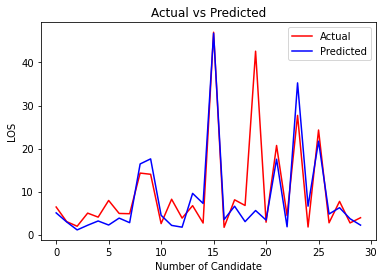

In [28]:
#Visualising the Acutal and predicted Result of first 30 examples
plt.plot(y_test[:30], color = 'red', label = 'Actual')
plt.plot(y_predicted_dl[:30], color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

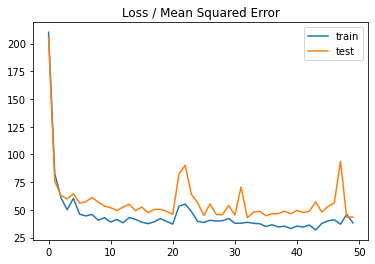

In [29]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [16]:
"""
    MLPRegressor - Best Hyper-parameters
"""

final_mlp = MLPRegressor(solver='adam',   #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=0.0001,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(32, 12), 
                   activation='relu', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   learning_rate = 'constant',
                    max_iter=2000)

final_mlp.fit(X_train, y_train)
y_pred_mlp = final_mlp.predict(X_test)

mape_mlp = round(mean_absolute_percentage_error(y_test, y_pred_mlp) * 100, 3)
mspe_mlp = round(np.mean(np.square(((y_test - y_pred_mlp) / y_test)), axis=0) * 100, 3)
r2_mlp = round(r2_score(y_test,y_pred_mlp), 3)
r2_mlp

0.835

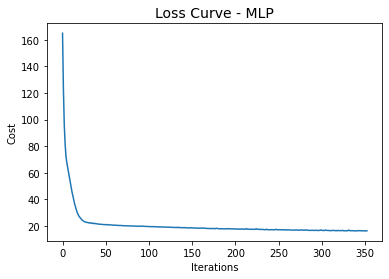

In [17]:
plt.plot(final_mlp.loss_curve_)
plt.title("Loss Curve - MLP", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

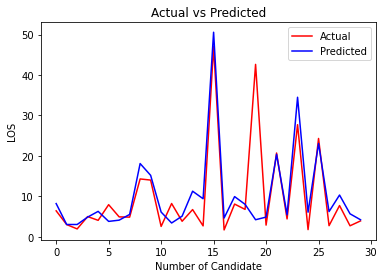

In [18]:
#Visualising the Acutal and predicted Result of first 30 examples
plt.plot(y_test[:30], color = 'red', label = 'Actual')
plt.plot(y_pred_mlp[:30], color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [19]:
"""
    Random Forest - Best Hyper-parameters
"""

r_forest_final = RandomForestRegressor(n_estimators=100, max_depth=110)

r_forest_final.fit(X_train, y_train)
y_pred_rf = r_forest_final.predict(X_test)

mape_rf = round(mean_absolute_percentage_error(y_test, y_pred_rf) * 100, 3)
mspe_rf = round(np.mean(np.square(((y_test - y_pred_rf) / y_test)), axis=0) * 100, 3)
r2_rf = round(r2_score(y_test,y_pred_rf), 3)
r2_rf

0.795

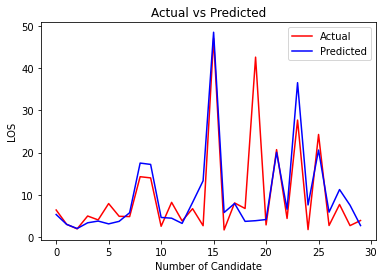

In [20]:
#Visualising the Acutal and predicted Result of first 30 examples
plt.plot(y_test[:30], color = 'red', label = 'Actual')
plt.plot(y_pred_rf[:30], color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [21]:
"""
    Linear Regression - Best Hyper-parameters
"""

final_linear = Lasso(alpha=0.1)

final_linear.fit(X_train, y_train)
y_pred_linear = final_linear.predict(X_test)

mape_linear = round(mean_absolute_percentage_error(y_test, y_pred_linear) * 100, 3)
mspe_linear = round(np.mean(np.square(((y_test - y_pred_linear) / y_test)), axis=0) * 100, 3)
r2_linear = round(r2_score(y_test,y_pred_linear), 3)
print(r2_linear)

0.73


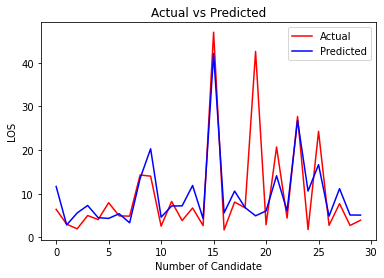

In [22]:
#Visualising the Acutal and predicted Result of first 30 examples
plt.plot(y_test[:30], color = 'red', label = 'Actual')
plt.plot(y_pred_linear[:30], color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

### Results visualization

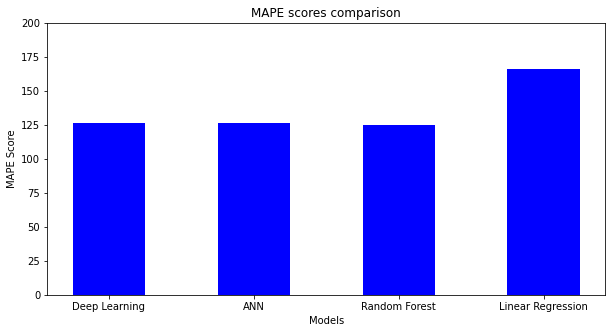

In [30]:
"""
    Compare MAPE scores
"""

values = [mape_dl, mape_mlp, mape_rf, mape_linear]
models = ["Deep Learning", "ANN", "Random Forest", "Linear Regression"]

fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='blue',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MAPE Score")
plt.title("MAPE scores comparison")
plt.ylim(0,200)
plt.show()

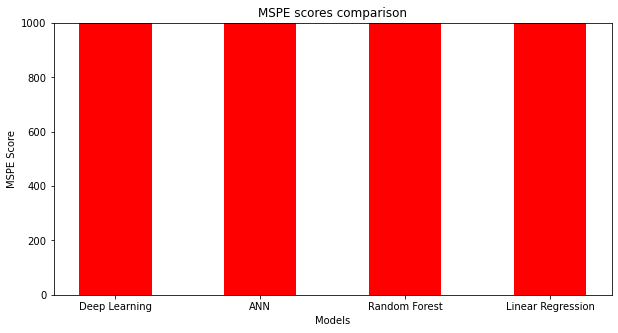

In [31]:
"""
    Compare MSPE scores
"""

values = [mspe_dl, mspe_mlp, mspe_rf, mspe_linear]
models = ["Deep Learning", "ANN", "Random Forest", "Linear Regression"]

fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='red',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MSPE Score")
plt.title("MSPE scores comparison")
plt.ylim(0,1000)
plt.show()

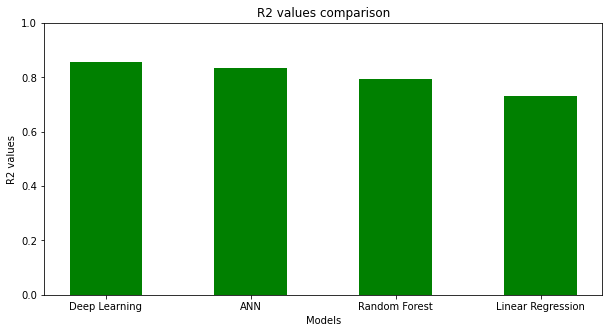

In [32]:
"""
    Compare R2 values
"""

values = [r2_dl, r2_mlp, r2_rf, r2_linear]
models = ["Deep Learning", "ANN", "Random Forest", "Linear Regression"]

fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("R2 values")
plt.title("R2 values comparison")
plt.ylim(0.0,1)
plt.show()

In [33]:
columns = ('R2', 'MAPE', 'MSPE')
rows = ['DL', 'ANN', 'RF', 'LR']
data = [[r2_dl, mape_dl, mspe_dl],
        [r2_mlp, mape_mlp, mspe_mlp],
        [r2_rf, mape_rf, mspe_rf], 
        [r2_linear, mape_linear, mspe_linear]]

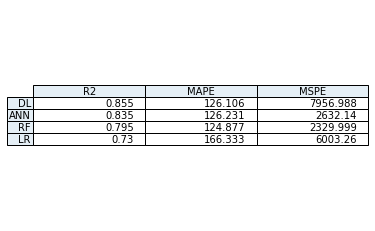

In [34]:
rcolors = plt.cm.BuPu(np.full(len(rows), 0.1))
ccolors = plt.cm.BuPu(np.full(len(data), 0.1))

fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = data,  
    rowLabels = rows,  
    colLabels = columns, 
    rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      loc='center')         
   
ax.set_title('', 
             fontweight ="bold") 
   
plt.show() 